# Title: Analysis of Resting Blood Pressure (mm Hg) and Maximum Heart Rate (bpm) for Heart Disease Severity Classification

# Introduction

For my final project, I will be using a modified version of the UCI Heart Disease dataset, specifically focusing on the Cleveland database. The UCI Heart Disease dataset includes data from four sources: Cleveland, Hungary, Switzerland, and the VA Long Beach. The Cleveland database used to predict heart disease is chosen due to its sufficient number of observations. Heart disease is a major global health concern and responsible for a significant portion of deaths worldwide. Early detection and accurate classification of heart disease are vital for effective treatment. Additionally, the ability to predict the severity of heart disease can help healthcare professionals prioritize interventions and provide the ideal treatments to individual patients' needs. The Heart Disease Cleveland dataframe includes the variables: "trestbps" and "thalach", which I will be using to predict our variable of interest: "num". In this dataframe, "trestbps" refers to the "resting blood pressure (mm Hg)" on admission to the hospital, while "thalach" refers to "maximum heart rate achieved (beats per minute, bpm)", and "num" means the diagnosis of heart disease with a value of: 0 means no heart disease, 1-4 means the levels of heart disease[1]. I would classify levels of heart disease as 1 and 2 = Moderate, 3 and 4 = Life threatening[2]. In this way, it would more easier to manipulate the data. With these resources, I will be answering the question: Can we classify the extent of heart disease using resting blood pressure and maximum heart rate achieved?

[1]: Source from Piazza question @555

[2]: For the levels of heart disease, I refer to the document https://www.rigshospitalet.dk/afdelinger-og-klinikker/kraeft-og-organsygdomme/blodsygdomme/forskning/forsoegsbehandling/Documents/Lymfomer/Triangle/Triangle-SAE.pdf

# Methods and Results:

# Let's load and install the packages that are needed to tidy the dataset:

In [21]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows

# Loading Data from the original source

Below, there are two ways to load the data into R so that I can manipulate it. The first way is that the data is directly read from the Web I got this link from the githut shared in the final project assignement, where I clicked on the folder containg the heart disease data, and click on the raw option that brought me to a new page with a new linkwhere all of the columns and rows of the data were. The other way is to directly read using the function read.table() and assigning sep = ",", since the data is separated by numbers in the dataset by comma, from the jupiter notebbok folter, which contains the heart disease data.

In [32]:
# I copied the new link and assigned it to url.
url <- "https://raw.githubusercontent.com/UBC-DSCI/dsci-100-project_template/main/data/heart_disease/processed.cleveland.data"

# Using the read_csv to read the data from url and assigning col_names = FALSE functions to read the data frame that contains no column names.
cleveland_data <- read_csv(url, col_names = FALSE)

# This is the other way
# Using the function read.table() and assigning sep = ","
cleveland_data_2 <- read.table("data/heart_disease/processed.cleveland.data", sep = ",")

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


But, i am coming to use the first way to load the dataset and use it. It is just my personal preference. You can use the other way if you want.

# Data Wrangling:

In [23]:
# First, assign the column names of each column based on the UCI Website:
# https://archive.ics.uci.edu/dataset/45/heart+disease
colnames(cleveland_data) <- c('age','sex','cp','trestbps','chol','fbs', 'restcg', 
                              'thalach','exang','oldpeak','slope','ca','thal','num')

# This second step is to mutate the variables so that all of the columns/variables have the correct type according
# to the wedsite that the original dataset comes from
cleveland_clean <- cleveland_data |> mutate(age = as.numeric(age), sex = as_factor(sex), cp = as_factor(cp),
                                            trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as_factor(fbs),
                                            restcg = as_factor(restcg), thalach = as.numeric(thalach), exang = as_factor(exang),
                                            oldpeak = as.numeric(oldpeak), slope = as.numeric(slope), ca = as.numeric(ca),
                                            thal = as_factor(thal), num = as.factor(num)) |>

# This third step is to change gender/sex into words (male and female) instead of numbers (1 and 0) to make the data more readable 
# to readers using the functions of mutate and fct_recode
                                     mutate(sex = fct_recode(sex, "male" = "1", "female" = "0"),

# This fourth step is to change the level of heart disease representing by numbers to a more readable description of the heart disease 
# diagnose using the functions of mutate,case_when, and fct_recode. We can use case_when() function to create the values for the new column.

                                            num = case_when(
                                                                num == "0" ~ "No heart disease",
                                                                    num %in% c("1", "2") ~ "Moderate",
                                                                    num %in% c("3", "4") ~ "Life threatening")) |>

# Using again mutate and as_factor functions to make num into a factor.
                                                                    mutate(num = as_factor(num)) |>

# This fifth step is to use the function drop_na() to remove rows containing missing (NA) values from a data frame.
                                                                      drop_na()

# Add a title to the title for viewers to easily understand the content of the table. Also, I will be adding title to every table and plot.
title <- "Table 1: Dataset of Cleveland's heart disease"
cat("\n", title, "\n")
cleveland_clean 

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”



 Table 1: Dataset of Cleveland's heart disease 


age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
63,male,1,145,233,1,2,150,0,2.3,3,0,6.0,No heart disease
67,male,4,160,286,0,2,108,1,1.5,2,3,3.0,Moderate
67,male,4,120,229,0,2,129,1,2.6,2,2,7.0,Moderate
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,male,4,144,193,1,0,141,0,3.4,2,2,7.0,Moderate
57,male,4,130,131,0,0,115,1,1.2,2,1,7.0,Life threatening
57,female,2,130,236,0,2,174,0,0.0,2,1,3.0,Moderate


# Splitting data

I split the data into training (75%) and testing (25%) and set seed for reproducibility when using any randomizing function. Also, I Select columns for easier data analysis: trestbps, thalach, num.

In [4]:
set.seed(2004)

cleveland_select <- cleveland_clean |> select(trestbps, thalach, num)

cleveland_split <- initial_split(cleveland_select, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

title <- "Table 2: Dataset of trestbps, thalach, and num"
cat("\n", title, "\n")
cleveland_train


 Table 2: Dataset of trestbps, thalach, and num 


trestbps,thalach,num
<dbl>,<dbl>,<fct>
140,160,Life threatening
132,173,Life threatening
130,132,Life threatening
⋮,⋮,⋮
120,169,No heart disease
132,166,No heart disease
120,182,No heart disease


# Plotting out a scatter plot using the unstandarized training data:

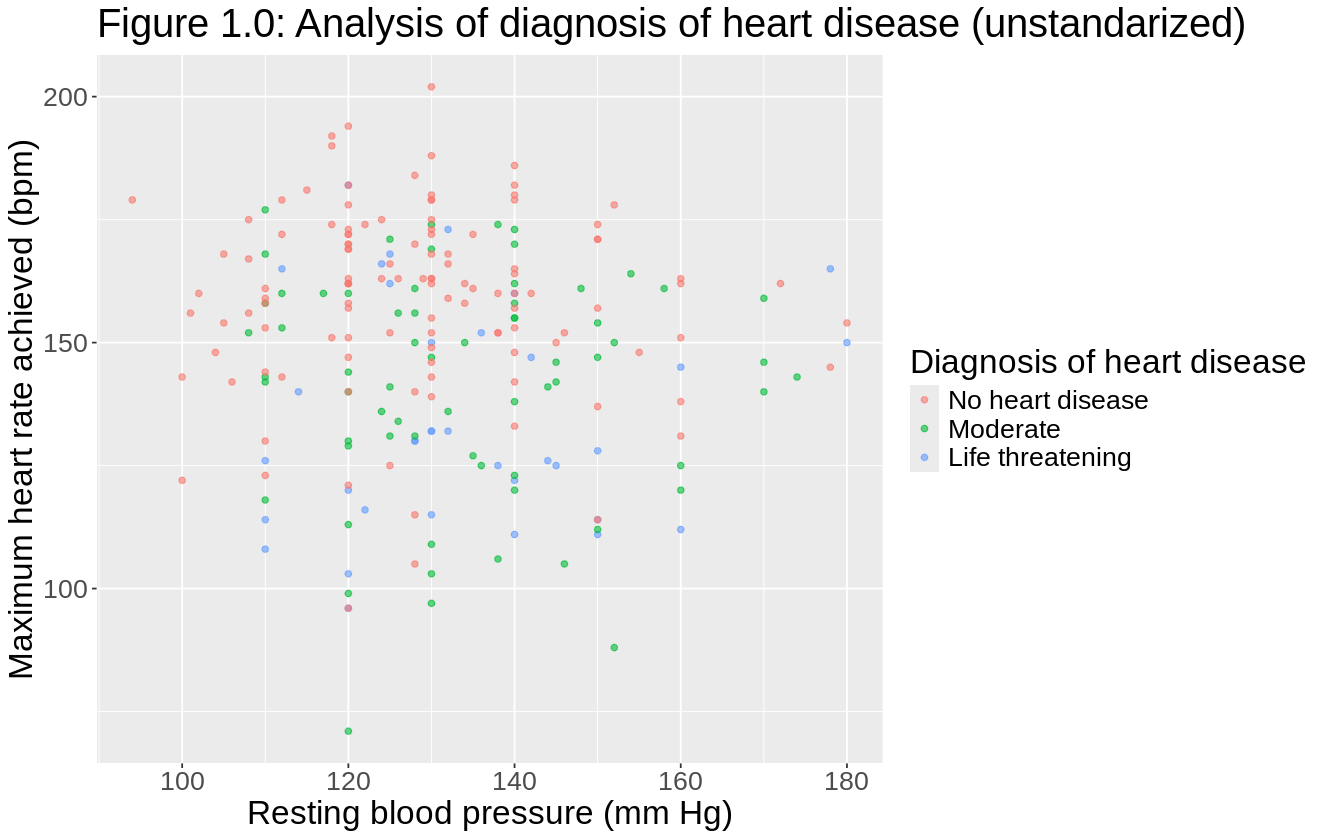

In [5]:
# This limits the width and height of the scatter plot
options(repr.plot.width = 11, repr.plot.height = 7)

# Using the function ggplot to plot out the scatter plot using the training data
cleveland_train_plot <- cleveland_train |>
                        ggplot(aes(x = trestbps , y = thalach , color = num)) +
                        geom_point(alpha = 0.6) +
                        labs(x = "Resting blood pressure (mm Hg)",y = "Maximum heart rate achieved (bpm)", 
                             color = "Diagnosis of heart disease") +
                        theme(text = element_text(size = 20)) +
                        ggtitle("Figure 1.0: Analysis of diagnosis of heart disease (unstandarized)")

cleveland_train_plot


# Summary of exploratory data analysis

I can see that it is very hard to see the relationship between Resting blood pressure (mm Hg) and Maximum heart rate achieved (bpm) in a sense of diagnosis of heart disease. Let's try to standardize the data and see if there is a more clear relationship.

# Finding the optimal K value for my k-nn classification model :

# Making the recipe:

In [6]:
# First, I make the recipe with the training data, containing the response variable,"num" (Diagnosis of heart disease), and 
# two predictors, "trestbps" (Resting blood pressure (mm Hg)) and "thalach" (Maximum heart rate achieved (bpm)).
heart_diagnosis_recipe <- recipe(num ~ trestbps + thalach, data =  cleveland_train) |>
# Second, this step is very important when dealing with k-nn classification is to standardize and center all predictors so that one would 
# be matter more than the others. This step would be using the function step_scale and step_center functions to the standardization.
    step_scale(all_predictors()) |>
    step_center(all_predictors())
heart_diagnosis_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



# Standardization of data

Standardization of data is very important because it makes sure the values of the variables are in a comparable scale such that one value of one variable is as important as the other ones.

In [7]:
set.seed(2004)
# One more time, I select the variables that I need for the data analysis
cleveland_select <- cleveland_clean |> select(trestbps, thalach, num)

# To standardize the data, I am going to use the prep and bake functions
cleveland_scaled <- heart_diagnosis_recipe|>
    prep() |>
    bake(cleveland_select)
title <- "Table 3: Standardized dataset of trestbps, thalach, and num"
cat("\n", title, "\n")
cleveland_scaled

# Split the scaled dataset into 75% of the scaled data into training set and the 25% into testing set
cleveland_split <- initial_split(cleveland_scaled, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)


 Table 3: Standardized dataset of trestbps, thalach, and num 


trestbps,thalach,num
<dbl>,<dbl>,<fct>
0.8293061,0.005884375,No heart disease
1.7255997,-1.831217384,Moderate
-0.6645167,-0.912666505,Moderate
⋮,⋮,⋮
0.76955316,-0.3877803,Moderate
-0.06698757,-1.5250338,Life threatening
-0.06698757,1.0556568,Moderate


# Let's visualize the standardized training data with a scatter plot

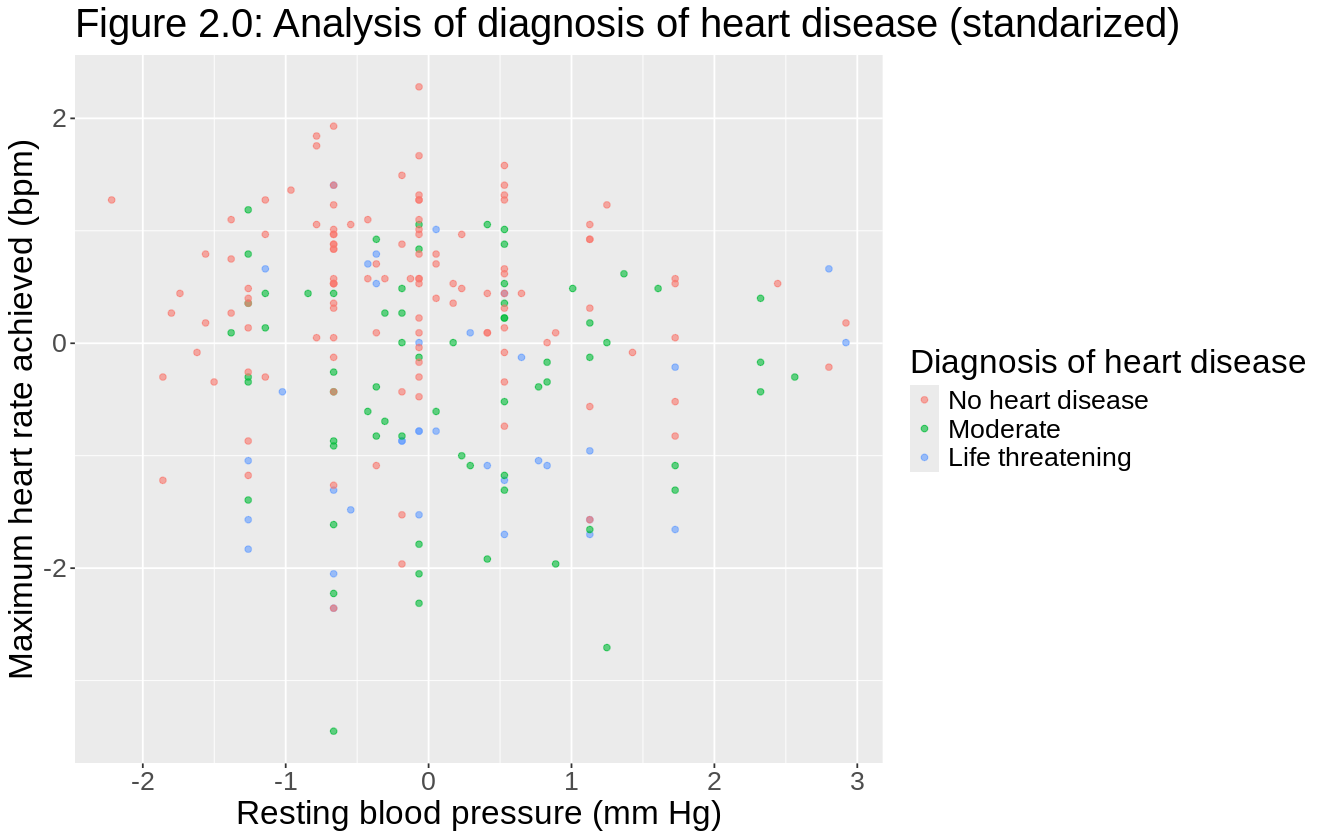

In [8]:
options(repr.plot.width = 11, repr.plot.height = 7)
cleveland_scaled <- cleveland_train |>
                        ggplot(aes(x = trestbps , y = thalach , color = num)) +
                        geom_point(alpha = 0.6) +
                        labs(x = "Resting blood pressure (mm Hg)",y = "Maximum heart rate achieved (bpm)", 
                             color = "Diagnosis of heart disease") +
                        theme(text = element_text(size = 20)) +
                        ggtitle("Figure 2.0: Analysis of diagnosis of heart disease (standarized)")

cleveland_scaled

As we can see in Figure 2, there is not a very clear relationship between the two variables Resting blood pressure (mm Hg) and Maximum heart rate achieved (bpm) in a sense of diagnosis of heart disease. However, it is not a big deal since we are using the K-nn classification that does not require the plot to show any relationsip to be able to classify the diagnosis of heart disease.

As we can see in this scatter plot (Figure 2.0), the values, after being standardized, of the two variables have the same value with the x-axis from -2 to 2 and y-axis from -2 to 2. Therefore, we can make predictions based on the classification model. Assuming that we want to know the diagnosis of the coordinate of (0.26,-0.18) based on the standardizd scale, resting blood pressure = 0.26 and maximum heart rate achieved = -0.18. What is the diagnosis of this patient's heart disease based on this observation?

# Making a testing model specification for K-nn classification

In [9]:
# First of all, I need to create a model specification for the K-nn classification by using the nearest_neighbor function and
# assigning the weight_func = rectangular. Therefore, each of the K-nearest neighbors gets exactly 1 vote and I randomly pick 
# a number for neighbor = 8 so that I can use this later for cross-validation.
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 8) |>

# After that, I would need to specify which package or system will be used for training the model. In this case, using the set_engine function.
    set_engine("kknn") |>

# Finally, I specify that this is a classification problem with the set_mode function.
    set_mode("classification")
heart_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 8
  weight_func = rectangular

Computational engine: kknn 


# Doing 5 and 10 cross-validation on the training data to compare their accuracy

A 5 cross-validation and 10 cross-validation would be performed to create multiple different splits in the training data set for the best parameter have multiple randomness to avarage and choose from. I would choose the one that has the higest accuracy to use it to tune the classification model. So, it can evaluate and pick the best number of neighbors to maximize the performation of the classifier on the data. I limit cross-validation to 5 or 10 folds because performing more folds can significantly increase computation time with only a minimal gain in accuracy. Therefore, it is not worth doing more than 10 folds given the additional time required.

# 5 cross-validation

In [10]:
set.seed(2004)
# vfold_cv function is used to split the data into a specified number of folds for cross-validation. 
# In this case, v = 5, meaning five folds for cross-validation.
# set the strata argument to the categorical label variable.
heart_5vfold <- vfold_cv(cleveland_train, v = 5, strata = num)

train_workflow_5 <- workflow() |>

# In the next step, I would be making the workflow using the function workflow that contains 
# the heart_diagnosis_recipe using the function add_recipe and heart_spec using the add_model function.
    add_recipe(heart_diagnosis_recipe) |>
    add_model(heart_spec) |>

# fit_resamples function is used to fit a model to resampled versions of the data and allows you to evaluate 
# the performance of a model across different subsets of the data without tuning hyperparameters.
    fit_resamples(resamples = heart_5vfold) |>

# Using the collect_metrics() function, I can summarize and retrieve performance metrics from resampling results.
    collect_metrics() |>

# Filter function is used to filter only the row in the .metric column that contains only "accuracy".
    filter(.metric == "accuracy")
title <- "Table 4: Accuracy of 5 cross-validation"
cat("\n", title, "\n")
train_workflow_5


 Table 4: Accuracy of 5 cross-validation 


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.5251471,5,0.01527345,Preprocessor1_Model1


In this case, having an accuracy of only 52.51% is pretty low.

# 10 cross-validation

I will be doing the same things as I did with 5 cross-validation. However, the only things I am going to change is v = 10 instead of v = 5.

In [24]:
set.seed(2004)
# vfold_cv function is used to split the data into a specified number of folds for cross-validation.
# set the strata argument to the categorical label variable.
heart_10vfold <- vfold_cv(cleveland_train, v=10, strata=num)

train_workflow_10 <- workflow() |>
    add_recipe(heart_diagnosis_recipe) |>
    add_model(heart_spec) |>

# fit_resamples function is used to fit a model to resampled versions of the data and allows you to evaluate 
# the performance of a model across different subsets of the data without tuning hyperparameters.
    fit_resamples(resamples = heart_10vfold) |>

# Using the collect_metrics() function, I can summarize and retrieve performance metrics from resampling results.
    collect_metrics() |>

# Filter function is used to filter only the row in the .metric column that contains only "accuracy".
    filter(.metric == "accuracy")
title <- "Table 5: Accuracy of 10 cross-validation"
cat("\n", title, "\n")
train_workflow_10


 Table 5: Accuracy of 10 cross-validation 


.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,multiclass,0.5398268,10,0.02256411,Preprocessor1_Model1


In this 10 cross-validation, I got a bit higher accuracy with 10 cross_validation (53.98%) than 5 cross-validation (52.51%).

# Tuning the model specification for K-nn classification

In [12]:
# First of all, I need to create a model specification for the K-nn classification by using the nearest_neighbor function and 
# assigning the weight_func = rectangular so that each of the K-nearest neighbors gets exactly 1 vote and neighbor = tune() 
# so that we can use this to find the optimal value for K.
heart_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) |>

#After that, I would need to specify which package or system will be used for training the model. In this case, using the set_engine function.
    set_engine("kknn") |>

#Finally, I specify that this is a classification problem with the set_mode function.
    set_mode("classification")

# Making the workflow to find out the best value for k

In [26]:
# In this step, I create a set of number to be used to test and find the best K value for the classification model.
# Using the tibble function to make it into a data frame and seq function to create a sequence of numbers from 1 to 30 and increases each time by 1.
k_values <- tibble(neighbors = seq(from = 1, to = 30, by = 1))

# In the next step, I would be making the workflow using the function workflow that contains 
# the heart_diagnosis_recipe using the function add_recipe and heart_spec_tune using the add_model function.
knn_best_values <- workflow () |>
    add_recipe(heart_diagnosis_recipe) |>
    add_model(heart_spec_tune) |>

# I would be using the heart_10vfold result from the 10 cross-validation since it has the higest accuracy compared to 5 cross-validation.
    tune_grid(resamples = heart_10vfold, grid = k_values) |>

# Using the collect_metrics() function, I can summarize and retrieve performance metrics from tuning results.
    collect_metrics() |>

# Filter function is used to filter only the row in the .metric column that contains only "accuracy".
    filter(.metric == "accuracy")
title <- "Table 6: Accuracy of each value of neighbors"
cat("\n", title, "\n")
knn_best_values


 Table 6: Accuracy of each value of neighbors 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.4641163,10,0.04580015,Preprocessor1_Model01
2,accuracy,multiclass,0.4641163,10,0.04580015,Preprocessor1_Model02
3,accuracy,multiclass,0.5187371,10,0.04092147,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
28,accuracy,multiclass,0.5658950,10,0.02763159,Preprocessor1_Model28
29,accuracy,multiclass,0.5665255,10,0.02393248,Preprocessor1_Model29
30,accuracy,multiclass,0.5669396,10,0.02517496,Preprocessor1_Model30


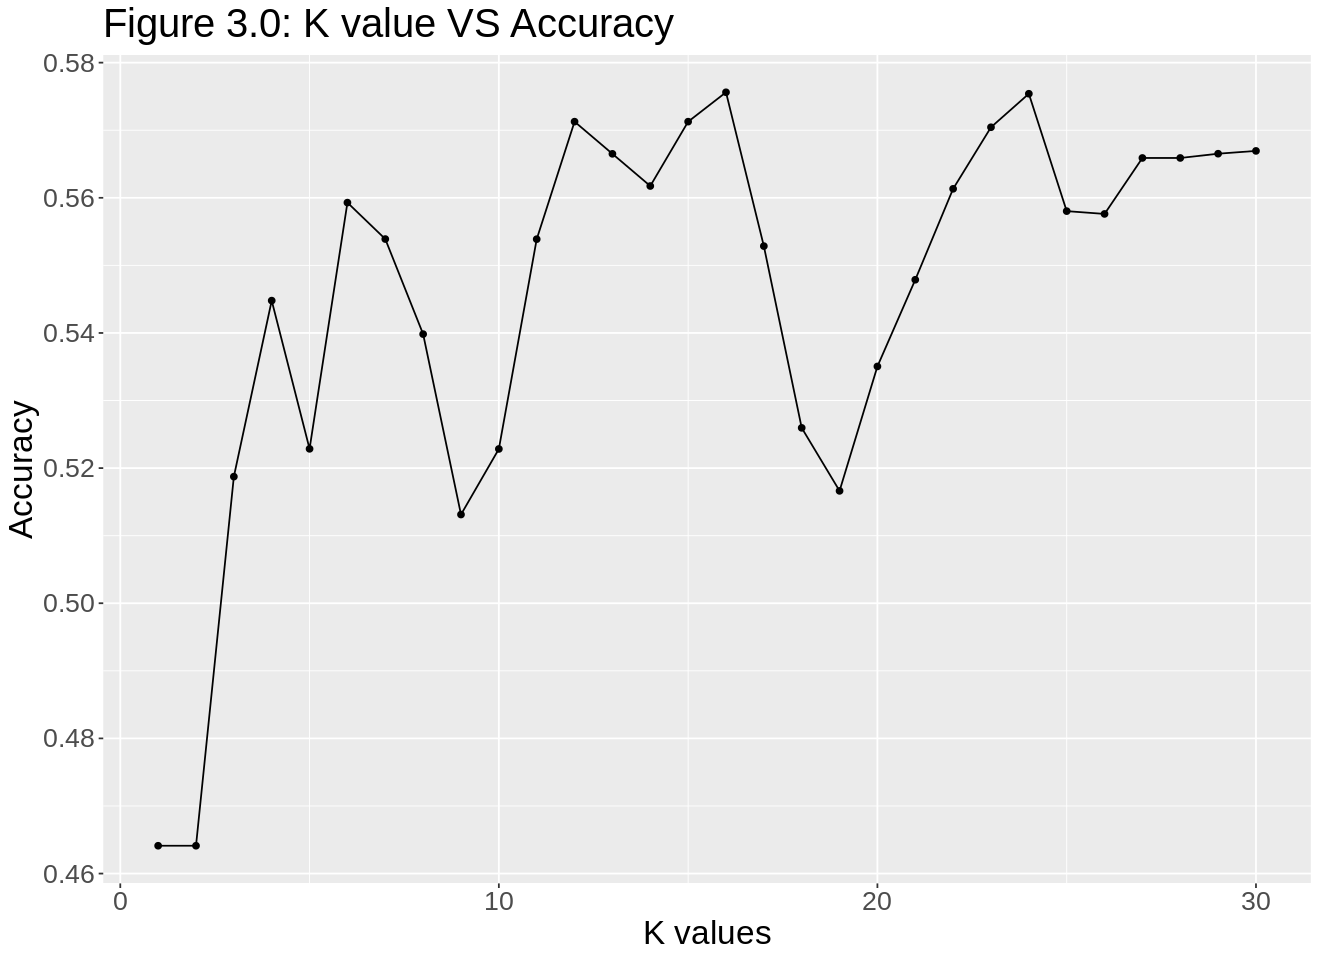

In [27]:
# To visualize and find out the best K value, I would make a graph using the ggplot, geom_line, geom_point function.
options(repr.plot.witdh = 7, repr.plot.height = 8)
knn_plot <- knn_best_values |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line(aes(x = neighbors, y = mean)) +
    xlab("K values") +
    ylab("Accuracy") +
    ggtitle("Figure 3.0: K value VS Accuracy") +
    theme(text = element_text(size = 20))
knn_plot

# Well, it seem like that it is easy to find out the best K value by looking at the plot and it is 16 since each of those whole dots
# in the scatter plot (Figure 3.0) represents a whole number.

In [29]:
# Let's see if the answer gotten by looking at the scatter plot is right
# Using the functions of arrange and desc to arrange the accuracy of the K values from high to low. 
k_best <- knn_best_values |> 
    arrange(desc(mean)) |>

# Using the function head() to show the line/row of data that I am interested, which is the first line
    head(1) |>

# Using the pull function to make the K value into a number, not into a dataset or dataframe so that I can use this later
# for the new K-nn specification
    pull(neighbors)
k_best

[1] 16

And, I got 16, which coincided with the scatter plot (Figure 3.0).

# Now, let's make the new K specification and testing it with the testing dataset to find the accuracy, precision, and recall of that best K value

In [30]:
new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_best) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_best_k <- workflow() |>
    add_recipe(heart_diagnosis_recipe) |>
    add_model(new_knn_spec) |>
    fit(cleveland_train)

# Using the predict function to predict the data in the testing dataset and see how well can the trained classifier be.
heart_diagnosis_test_prediction <- predict(knn_best_k, cleveland_test) |>

# Using the bind_cols function to add the predicted results to the testing dataset so that I can compare the results.
                                        bind_cols(cleveland_test)
title <- "Table 7: Predicting values vs Actual values"
cat("\n", title, "\n")
heart_diagnosis_test_prediction

heart_diagnosis_test_prediction_accuracy <- heart_diagnosis_test_prediction |>

# metrics function is used to evaluate the performance of machine learning models
  metrics(truth = num, estimate = .pred_class) |>

# Filter function is used to filter only the row in the .metric column that contains only "accuracy".
  filter(.metric == "accuracy")
title <- "Table 8: Accuracy of the model with the best K value"
cat("\n", title, "\n")
heart_diagnosis_test_prediction_accuracy


 Table 7: Predicting values vs Actual values 


.pred_class,trestbps,thalach,num
<fct>,<dbl>,<dbl>,<fct>
Life threatening,1.72559970,-1.8312174,Moderate
No heart disease,-0.06698757,1.6242835,No heart disease
Moderate,-0.06698757,-0.3440398,Moderate
⋮,⋮,⋮,⋮
No heart disease,0.5305415,-0.2565587,Moderate
Moderate,1.9646113,-2.6185467,Life threatening
No heart disease,-1.2620457,-0.7814450,Moderate



 Table 8: Accuracy of the model with the best K value 


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5394737


# Let's check out the precision of this classifier

In [17]:
heart_diagnosis_test_presicion <- heart_diagnosis_test_prediction |>

# presicion function is used to obtain information about the precision of this classifier.
  precision(truth = num, estimate = .pred_class, event_level = "first")
title <- "Table 9: Precision of the model with the best K value"
cat("\n", title, "\n")
heart_diagnosis_test_presicion


 Table 9: Precision of the model with the best K value 


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,macro,0.3594771


# Here is the recall of this classifier:

In [18]:
heart_diagnosis_test_recall <- heart_diagnosis_test_prediction |>

# recall function is used to obtain information about the recall of this classifier.
    recall(truth = num, estimate = .pred_class, event_level = "first") 
title <- "Table 10: Recall of the model with the best K value"
cat("\n", title, "\n")
heart_diagnosis_test_recall


 Table 10: Recall of the model with the best K value 


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,macro,0.377872


As we can see, both precisioon (35.95%) and recall (37.79%) of this model is not very high due to the complexity of the data since it is a multiclass. The precision and recall are even lower than the accuracy of the classifier.

# Testing the model with a new observation

Back to the question, I had made in the Figure 2.0, What is the diagnosis of this patient's heart disease based on this observation, resting blood pressure = 0.26 and maximum heart rate achieved = -0.18?. Let's create a tibble containg those information in the new observation and make the prediction.

In [31]:
set.seed(2004) 

# Using the tibble function, it can create a tibble containing the information in the new observation.
new_obs <- tibble(trestbps = 0.26, thalach = -0.18)

# Use the predict function to predict and classify the new observation.
clevaland_new_predict <- predict(knn_best_k, new_obs)
title <- "Table 11: Result of testing the model with a new observation"
cat("\n", title, "\n")
clevaland_new_predict


 Table 11: Result of testing the model with a new observation 


.pred_class
<fct>
No heart disease


As a result, the predicted class of diagnosis is not having a heart disease. However, the accuracy of the model is only 53.94%. So, this prediction is still containg some potential uncertainties.

# Confusion Matrix of the Classifier

A confusion matrix is made to show how many test set labels of each type are predicted correctly and incorrectly, which gives us more details about the kinds of mistakes the classifier tends to make.

In [20]:
set.seed(2004)

heart_matrix <- heart_diagnosis_test_prediction |>

# The function conf_mat is used to obtain information about how many test set labels of each type are predicted 
# correctly and incorrectly, which gives us more details about the kinds of mistakes the classifier tends to make.
    conf_mat(truth = num, estimate = .pred_class)
title <- "Table 12: Confusion matrix of the classifier"
cat("\n", title, "\n")
heart_matrix


 Table 12: Confusion matrix of the classifier 


                  Truth
Prediction         No heart disease Moderate Life threatening
  No heart disease               34       14                3
  Moderate                        1        7                9
  Life threatening                6        2                0

The confusion matrix of this model shows that it correctly classiy 34 patients with "no heart disease", 7 patients with "moderate heart disease", and 0 for "life-threatening heart disease". Additionally, the model incorrectly identified 14 patients with "no heart disease" as having "moderate heart disease" and 3 patients as having "life-threatening heart disease". Also, the model incorrectly identified 1 patient with "moderate heart disease" as having "no heart disease", 6 patients with "life-threatening heart disease" as having "no heart disease", and 2 patients with "life-threatening heart disease" as having "moderate heart disease". As we can see, this model is not very good at predicting and classifying 'life-threatening heart disease" as well as "moderate heart disease", since it makes more mistakes compared to the actual corrected numbers of predictions.

# Discussion:

With this classification model, I am able to distinguish the different diagnosis of heart disease when the predictor variables (resting blood pressure and maximum heart rate achieved) are not in an extreme value that is obvious enough for us to determine manually. However, as it may be clearly seen from the visualizations(Figures 1.0 and 2.0) , it is very hard to see a clear relationship between the two predictor variables (resting blood pressure and maximum heart rate achieved) that can relate them with heart disease. Additionally, the confusion matrix shows us how well and bad the model is at predicting and classifying diagnosis of heart disease. In addition, the outcomes from the two predictors are "No heart disease", "Moderate", or "Life threatening". Therefore, this uncleared relationship and having multiple outcomes have been causing a lot of problems in the accuracy of the classification model. Also, this has lead to a low precision and recall of this classifier. Even though I have standardized the data, it was still showing no signs of relationship between the two predictor variables (resting blood pressure and maximum heart rate achieved) that can relate them with heart disease. Unfortunately, all of these things are not what I have expected to see. I have thought that there is a relationship between two variables (resting blood pressure and maximum heart rate achieved) that can be used to predict heart's disease diagnosis. For example, if a patient has a high resting blood pressure and a low value of maximum heart rate, I would expect that this patient would have heart's disease. But, it was not by looking at some points in the Figure 2.0 scatter plot. 


On the other hand, this findings can be used to prove that resting blood pressure and maximum heart rate achieved are not related when trying to diagnose a patient's heart disease. And, there are other more factors that we need to consider when trying to diagnose a patient's heart disease so that we can get a more precise diagnosis of a patient's heart disease. We might also consider the patient's the level of blood pressure, cholesterol, lipoprotein, and thrombosis when trying to diagnose a patient's heart disease. And, treat each variables as individual/independent variable from each other since "elevated heart rate values measured at rest,resting blood pressure, have an adverse prognostic impact in the hypertensive patient, being associated with an increased risk of cardiovascular events and complications" from a research done by Grassi et al., (2023).


Given that the results from this classifier, it shows no significant relationship between the two variables (resting blood pressure and maximum heart rate achieved) when trying to use them to diagnose a patient's heart disease. Thus, we might want to use other methods of classification and other factors/variables. Also, having the results from the confucion matrix, we can make some changes to improve the model. Overall, this classifier's results can be used to prove people that resting blood pressure and maximum heart rate achieved are not the only things we should consider the most important when trying to diagnose a patient's heart disease. We might also consider the patient's the level of blood pressure, cholesterol, lipoprotein, and thrombosis. A research from Kubota et al., (2017) described other factors,can help to determine heart disease, such as "other potential CVD risk factors, including race (white or African American), body mass index, hypertension (systolic blood pressure ≥140 mm Hg, diastolic blood pressure ≥90 mm Hg, or hypertension medication use), diabetes mellitus (a fasting blood glucose ≥126 mg/dL, nonfasting blood glucose ≥200 mg/dL, a self-reported physician diagnosis of diabetes, or use of antidiabetic medication in the past 2 weeks) [12], high-density lipoprotein cholesterol, low-density lipoprotein cholesterol, smoking status (current, former, or never), alcohol drinking status (current, former, or never), physical activity, educational attainment (grade school, high school without graduation, high school with graduation, vocational school, college with or without graduation, or graduate, or professional school), and heart rate". Using more variables and factors, we might be able to create a classifier that can help us to diagnose some heart disease, which can help predicting heart disease that are not easy to notice and saving people lives.

# References:

1. Grassi, G.; Dell’Oro, R.; Bombelli, M.; Cuspidi, C.; Quarti-Trevano, F. High Blood Pressure with Elevated Resting Heart Rate: A High Risk “Sympathetic” Clinical Phenotype. Hypertension Research 2023, 46 (10), 2318–2325. https://doi.org/10.1038/s41440-023-01394-9.
‌



2. Kubota, Y.; Chen, L. Y.; Whitsel, E. A.; Folsom, A. R. Heart Rate Variability and Lifetime Risk of Cardiovascular Disease: The Atherosclerosis Risk in Communities Study. Annals of Epidemiology 2017, 27 (10), 619-625.e2. https://doi.org/10.1016/j.annepidem.2017.08.024.
‌
‌